<a href="https://colab.research.google.com/github/FTDS-001/G3P0/blob/Haikal_Usman/h8dsft_P0W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perkenalan**

**Practical Statistic**

by. Haikal Ramadhan Usman

Dataset yang akan digunakan dapat diakses di https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

Objective dari Analysis ini adalah Mengimplementasikan Measure of Central Tendency, Measure of Variance dan melakukan Hypothesis Testing pada dataset

# Import Library yang akan digunakan

1. matplotlib: digunakan untuk memvisualisasikan data
2. pandas: untuk meloading dataset
3. numpy: untuk perhitungan numerik
4. scypy: untuk hypothesis testing

In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta as beta_fun
import seaborn as sns

# Data Loading

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haikalramadhanusman","key":"cefd766b972f55aed9f6c178a3d98dad"}'}

In [3]:
# Bikin directory dengan nama kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kemical/kickstarter-projects

 65% 24.0M/36.8M [00:00<00:00, 76.4MB/s]
100% 36.8M/36.8M [00:00<00:00, 122MB/s] 


In [5]:
from zipfile import ZipFile
file_name = "kickstarter-projects.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Read dataset:

In [9]:
df = pd.read_csv('/content/ks-projects-201801.csv')
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [10]:
df.tail(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.0,successful,78,CA,5019.92,4983.69,4529.81
378652,999971898,Beach Wrestling Documentary,Documentary,Film & Video,NOK,2015-04-28,20000.0,2015-03-29 21:30:33,21500.0,successful,36,NO,2698.97,2875.83,2675.19
378653,999972264,Islanda,Documentary,Film & Video,USD,2012-03-16,1700.0,2012-02-15 04:31:10,25.0,failed,1,US,25.00,25.00,1700.00
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.00,154.00,6500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.0,canceled,0,CA,0.00,0.00,4949.60
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.00,25.00,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.00,155.00,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.00,20.00,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.00,200.00,15000.00
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.00,524.00,2000.00


In [11]:
df.shape

(378661, 15)

Melihat datatype dari semua column menggunakan .info()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# Data Cleaning

Merubah Column menjadi list

In [13]:
df.columns.values

array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'], dtype=object)

In [14]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [15]:
df.columns.tolist()
print(type(df.columns.tolist()))
df.index.tolist()
print(type(df.index.tolist()))

<class 'list'>
<class 'list'>


Menghapus column yang tidak dipakai

In [16]:
df.drop(['currency','deadline','launched','goal','pledged','usd pledged'],axis=1,inplace=True)

In [17]:
df.head(10)

,ID,name,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,14,US,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,successful,224,US,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,16,US,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,failed,40,US,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,canceled,58,US,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,canceled,43,US,6240.57,65000.00


In [18]:
df.tail(10)

,ID,name,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
378651,999969812,AT THE BEACH,Classical Music,Music,successful,78,CA,4983.69,4529.81
378652,999971898,Beach Wrestling Documentary,Documentary,Film & Video,successful,36,NO,2875.83,2675.19
378653,999972264,Islanda,Documentary,Film & Video,failed,1,US,25.00,1700.00
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,failed,4,US,154.00,6500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,canceled,0,CA,0.00,4949.60
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,canceled,1,US,25.00,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,failed,5,US,155.00,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,failed,1,US,20.00,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,failed,6,US,200.00,15000.00
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,failed,17,US,524.00,2000.00


Mengubah column menjadi huruf kapital di awal

In [19]:
df.columns=df.columns.str.capitalize()
df

,Id,Name,Category,Main_category,State,Backers,Country,Usd_pledged_real,Usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,failed,6,US,200.0,15000.00


Mengganti karakter "_" dengan spasi

In [20]:
df.columns=df.columns.str.replace("_"," ")

In [21]:
df

,Id,Name,Category,Main category,State,Backers,Country,Usd pledged real,Usd goal real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,failed,6,US,200.0,15000.00


Merubah nama column Usd pledged real menjadi Pledged, dan Usd goal real menjadi Goal

In [22]:
df.rename(columns={'Usd pledged real':'Pledged','Usd goal real':'Goal'},inplace=True)
df.head(10)

,Id,Name,Category,Main category,State,Backers,Country,Pledged,Goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,14,US,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,successful,224,US,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,16,US,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,failed,40,US,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,canceled,58,US,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,canceled,43,US,6240.57,65000.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Id             378661 non-null  int64  
 1   Name           378657 non-null  object 
 2   Category       378661 non-null  object 
 3   Main category  378661 non-null  object 
 4   State          378661 non-null  object 
 5   Backers        378661 non-null  int64  
 6   Country        378661 non-null  object 
 7   Pledged        378661 non-null  float64
 8   Goal           378661 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 26.0+ MB


In [24]:
df.describe()

,Id,Backers,Pledged,Goal
count,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08


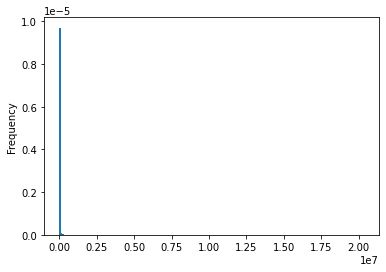

In [25]:
df['Pledged'].plot.hist(bins=200, density= True)

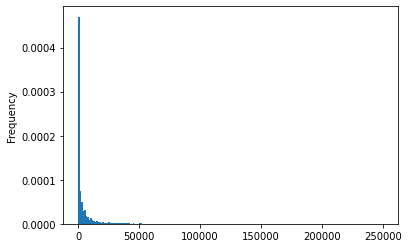

In [26]:
df_new=df[df['Pledged']<=250000]
df_new['Pledged'].plot.hist(bins=200, density= True)

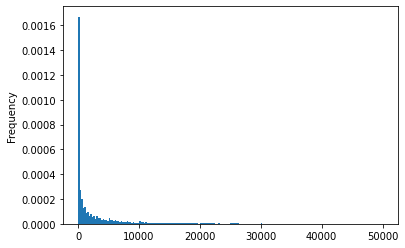

In [27]:
df_new=df[df['Pledged']<=50000]
df_new['Pledged'].plot.hist(bins=200, density= True)

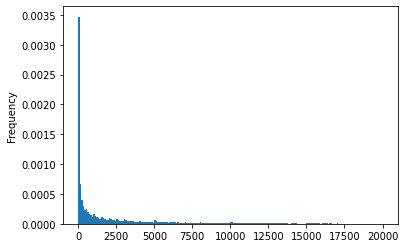

In [28]:
df_new=df[df['Pledged']<=20000]
df_new['Pledged'].plot.hist(bins=200, density= True)

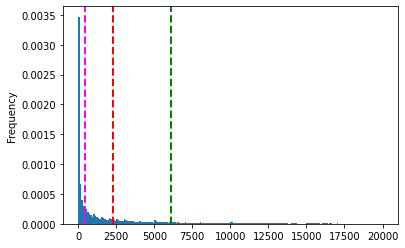

In [29]:
df_new['Pledged'].plot.hist(bins=200, density= True)
plt.axvline(df_new['Pledged'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_new['Pledged'].median(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_new['Pledged'].mean()+df_new['Pledged'].std()
            , color='green', linestyle='dashed', linewidth=2)

## Measure of Central Tendency and Measure of Variance

In [30]:
print('Pledge Min: $', df_new['Pledged'].min())
print('Pledge Mean: ${:,.2f}' .format (df_new['Pledged'].mean()))
print('Pledge Median: ${:,.2f}' .format (df_new['Pledged'].median()))
print('Pledge Modus: ${:,.2f}' .format (df_new['Pledged'].mode()[0]))
print('Pledge Max: $', df_new['Pledged'].max())
print(df_new['Pledged'].quantile([0.25,0.50,0.75]))
print('Pledged Variance: ', df_new['Pledged'].var())
print('Pledged Standart Deviation: ', df_new['Pledged'].std())

Pledge Min: $ 0.0
Pledge Mean: $2,294.83
Pledge Median: $455.00
Pledge Modus: $0.00
Pledge Max: $ 20000.0
0.25      25.0
0.50     455.0
0.75    2820.0
Name: Pledged, dtype: float64
Pledged Variance:  14589375.390357504
Pledged Standart Deviation:  3819.604088169022


In [31]:
print('Goal Min: $', df_new['Goal'].min())
print('Goal Mean: ${:,.2f}' .format (df_new['Goal'].mean()))
print('Goal Median: ${:,.2f}' .format (df_new['Goal'].median()))
print('Goal Modus: ${:,.2f}' .format (df_new['Goal'].mode()[0]))
print('Goal Max: ${:,.2f}' .format (df_new['Goal'].max()))
print(df_new['Goal'].quantile([0.25,0.50,0.75]))
print('Goal Variance: ', df_new['Goal'].var())
print('Goal Standart Deviation: ', df_new['Goal'].std())

Goal Min: $ 0.01
Goal Mean: $44,890.50
Goal Median: $5,000.00
Goal Modus: $5,000.00
Goal Max: $166,361,390.71
0.25     2000.000
0.50     5000.000
0.75    13587.875
Name: Goal, dtype: float64
Goal Variance:  1420134583136.2603
Goal Standart Deviation:  1191693.997272899


In [32]:
for ind in ['Pledged', 'Goal']:
  print(df_new[ind].name, 'Range: ${:,.2f}' .format(df_new[ind].max()-df_new[ind].min()))

Pledged Range: $20,000.00
Goal Range: $166,361,390.70


In [33]:
df_new.describe()

,Id,Backers,Pledged,Goal
count,3.515270e+05,351527.000000,351527.000000,3.515270e+05
mean,1.074880e+09,35.731372,2294.828587,4.489050e+04
std,6.190780e+08,69.254191,3819.604088,1.191694e+06
min,5.971000e+03,0.000000,0.000000,1.000000e-02
25%,5.386737e+08,1.000000,25.000000,2.000000e+03
50%,1.075579e+09,9.000000,455.000000,5.000000e+03
75%,1.610268e+09,41.000000,2820.000000,1.358788e+04
max,2.147472e+09,4015.000000,20000.000000,1.663614e+08


## Corelation

Adanya dugaan adanya korelasi antara Backers dan Pledged dimana semakin banyak Backers maka semakin banyak pula Pledged

In [34]:
df.corr()

,Id,Backers,Pledged,Goal
Id,1.000000,0.000654,-0.000025,0.001854
Backers,0.000654,1.000000,0.752539,0.004517
Pledged,-0.000025,0.752539,1.000000,0.005596
Goal,0.001854,0.004517,0.005596,1.000000


In [35]:
np.corrcoef(df['Backers'],df['Pledged'])

array([[1.        , 0.75253938],
       [0.75253938, 1.        ]])

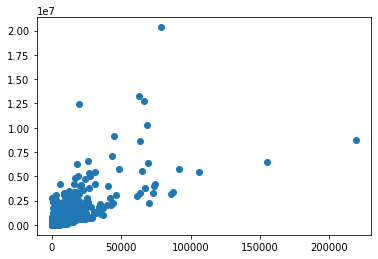

In [36]:
plt.scatter(df['Backers'],df['Pledged'])

Dilihat dari plot diatas, korelasi antara Backers dan Pledges positif. 

# Hypothesis Testing

## Chi Squared Testing:

H0: Main category dan State tidak saling mendukung, tidak ada hubungan diantara kedua column

H1: Main category dan State saling mendukung, ada hubungan diantara kedua column

In [37]:
df_chi=df_new.groupby(['Category','State']).count()[['Id']].reset_index()
df_chi.head(10)

,Category,State,Id
0,3D Printing,canceled,79
1,3D Printing,failed,297
2,3D Printing,live,8
3,3D Printing,successful,77
4,3D Printing,suspended,12
5,3D Printing,undefined,1
6,Academic,canceled,115
7,Academic,failed,586
8,Academic,live,11
9,Academic,successful,168


In [38]:
df_chi=df_chi.pivot(index='Category',columns='State',values='Id').fillna(0)

In [39]:
df_chi

State,canceled,failed,live,successful,suspended,undefined
Category,,,,,,
3D Printing,79.0,297.0,8.0,77.0,12.0,1.0
Academic,115.0,586.0,11.0,168.0,13.0,0.0
Accessories,338.0,1660.0,53.0,846.0,26.0,3.0
Action,108.0,507.0,7.0,85.0,3.0,0.0
Animals,17.0,166.0,3.0,56.0,5.0,0.0
...,...,...,...,...,...,...
Woodworking,92.0,766.0,11.0,277.0,6.0,0.0
Workshops,10.0,98.0,4.0,48.0,2.0,0.0
World Music,143.0,1016.0,13.0,870.0,6.0,0.0


In [40]:
chiSqr, pVal, dof, expected = stats.chi2_contingency(df_chi)
print(f'chi2: {chiSqr:.2f}')
print(f'p-value: {pVal:.2f}')
print(f'degree of freedom: {dof:.2f}')

chi2: 85324.82
p-value: 0.00
degree of freedom: 790.00


Nilai Chi Squared sangaat besar dan p-Value sangat kecil (p-Value<0.05) sehingga dapat dikatakan bahwa Category dan State mempunyai hubungan sehingga H0 rejected.

## Two Sample Test

In [44]:
dfC=df_new.groupby('Category').agg({'Pledged':['count','mean']}).reset_index()
dfC.columns = dfC.columns.droplevel()

In [45]:
dfC.sort_values('count',ascending=False).head(10)

,,count,mean
113,Product Design,17910,3541.694769
90,Music,15088,2818.959614
39,Documentary,14159,2994.252573
129,Shorts,12074,2695.241988
136,Tabletop Games,11104,4549.142569
58,Food,10695,2413.526970
148,Video Games,10557,2010.987732
55,Film & Video,9592,2033.538624
54,Fiction,9092,1089.389735
95,Nonfiction,8087,1818.501473


In [48]:
Fic=df_new[df_new['Category']=='Fiction']
Mus=df_new[df_new['Category']=='Music']

In [49]:
Fic

,Id,Name,Category,Main category,State,Backers,Country,Pledged,Goal
56,1000226576,Following the Call - A Novel,Fiction,Publishing,failed,0,US,0.00,13500.00
167,1000682368,"Rack and Ruin, Out of Orbit 3",Fiction,Publishing,failed,29,GB,2082.74,3959.58
236,1001033266,The Chameleon Chronicles: Colors of Fate,Fiction,Publishing,failed,1,US,1.00,500.00
260,1001149306,Night Terrors: Garden of Limbo,Fiction,Publishing,successful,14,US,1067.00,350.00
288,1001288451,"Paperback & Kindle available, but get it for l...",Fiction,Publishing,failed,6,GB,42.81,64.87
...,...,...,...,...,...,...,...,...,...
378363,998559453,Colonial Tales by Alessandro Spina,Fiction,Publishing,failed,44,GB,3154.84,8092.80
378526,999291866,Sherlock Holmes Re-Imagined,Fiction,Publishing,successful,53,GB,2361.16,657.70
378594,999667180,VARIANT WARS - The Prisoners,Fiction,Publishing,successful,7,US,425.00,325.00
378600,999687927,Reese and Reeves 2: A new novel,Fiction,Publishing,successful,47,US,1214.00,1000.00


In [50]:
Mus

,Id,Name,Category,Main category,State,Backers,Country,Pledged,Goal
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.00,5000.00
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,successful,7,US,250.00,250.00
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,successful,147,US,15827.00,10000.00
34,100012079,Chris Eger Band - New Nashville Record!,Music,Music,successful,92,US,13260.00,12000.00
41,1000153208,Phil Younger - Slow Down (Official Music Video),Music,Music,successful,34,US,2100.00,2100.00
...,...,...,...,...,...,...,...,...,...
378547,999405412,PUT Bakelite 78-What The Moon Has Done ON vinyl!!,Music,Music,failed,16,US,766.00,8000.00
378552,999422958,Phaxanation & the Dust Kickers: Our Full Lengt...,Music,Music,failed,6,US,78.00,2000.00
378572,999536763,The 5 O'Clocks (Canceled),Music,Music,canceled,14,US,1211.00,10000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,undefined,0,"N,0""",3273.36,3080.81


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


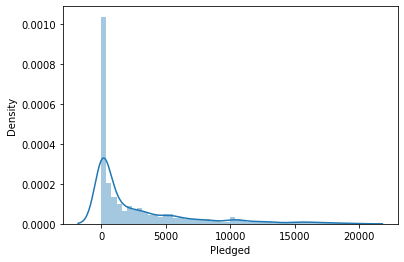

In [54]:
sns.distplot(Mus['Pledged'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


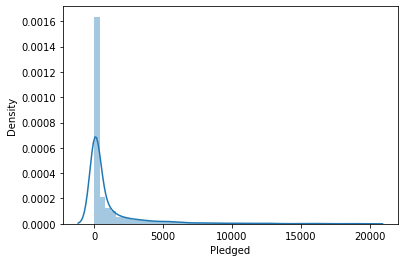

In [55]:
sns.distplot(Fic['Pledged'])

Fiction sample mean:1089.3897349318065
Fiction sample std:2403.993153616644
Fiction Kurtosis:16.790020441857624
Music sample mean:2818.9596142629794
t-statistic:41.44026691930209
p-value:0.000000


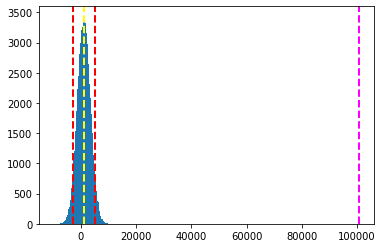

In [57]:
np.random.seed(123)
nonMath =Fic['Pledged']
math = Mus['Pledged']
print("Fiction sample mean:" + str(nonMath.mean()))
print("Fiction sample std:" + str(nonMath.std()))
print("Fiction Kurtosis:" + str(nonMath.kurtosis()))
print("Music sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Kesimpulan

p-Value sangat kecil (p-Value<0.05) sehingga dapat dikatakan bahwa Category dan State mempunyai hubungan sehingga H0 rejected.